## Enhancement factor

This notebook compares different formulas of enahancement factor as a function of La$_t$. These formulas are either taken directly or inferred indirectly from scalings for vertical velocity variance from LES studies of 
[McWilliams and Sullivan, 2000](https://doi.org/10.1016/S1353-2561(01)00041-X), [Smyth et al., 2002](https://doi.org/10.1007/s10236-002-0012-9), [Takaya et al., 2010](https://doi.org/10.1029/2009JC005985) with scaling from LES study of [Grant and Belcher, 2009](https://doi.org/10.1175/2009JPO4119.1), [Harcourt and D’Asaro, 2008](https://doi.org/10.1175/2007JPO3842.1), aligned and misaligned versions of [Van Roekel et al., 2012](https://doi.org/10.1029/2011JC007516).
Some formulas use different definitions of Langmuir number.
Therefore a distribution is estimated from the JRA55-do forced GOTM runs.
Enhanceme factors inferred from from direct mesurements of vertical velocity variance from [D'Asaro, 2001](https://doi.org/10.1175/1520-0485(2002)031%3C3530:TVKEIT%3E2.0.CO;2), [Tseng and D'Asaro, 2004](https://doi.org/10.1175/1520-0485(2004)034%3C1984:MOTVKE%3E2.0.CO;2) and [D'Asaro, 2014](https://doi.org/10.1146/annurev-marine-010213-135138) are also shown.

In [1]:
import sys
import os
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
sys.path.append(os.environ['GOTMWORK_ROOT']+'/tools', )
from gotmanalysis import GOTMOutputDataMap, GOTMOutputData, plot_dist_3p 
%matplotlib inline

In [2]:
casename = 'JRA55-do_Global_dampV5d_3h_r4'
tmname = 'KPP-CVMix'
update_data = False
plot_figure = True

In [3]:
# lists
timetag_list = ['20090101-20090131',
                '20090201-20090228',
                '20090301-20090331',
                '20090401-20090430',
                '20090501-20090531',
                '20080601-20080630',
                '20080701-20080731',
                '20080801-20080831',
                '20080901-20080930',
                '20081001-20081031',
                '20081101-20081130',
                '20081201-20081231']
ntag = len(timetag_list)
# paths
fig_root = os.environ['GOTMFIG_ROOT']+'/'+casename

In [4]:
# get data
mon_lat = []
mon_lon = []
mon_time = []
mon_laturb = []
mon_lasl = []
mon_laslp1 = []
mon_laslp2 = []
mon_theta_wl = []
mon_theta_ww = []
mon_bflux = []
mon_ustar = []
mon_hml = []
mon_hbl = []
for j in np.arange(ntag):
    timetag = timetag_list[j]
    # read surface forcing  data
    s1data_root = os.environ['GOTMRUN_ROOT']+'/'+casename+'/VR1m_DT600s_'+timetag
    s2data_root = os.environ['GOTMFIG_ROOT']+'/data/'+casename+'/VR1m_DT600s_'+timetag
    os.makedirs(s2data_root, exist_ok=True)
    os.makedirs(fig_root, exist_ok=True)
    basepath = s1data_root+'/'+tmname
    s2data_name = s2data_root+'/data_mapts_Langmuir_'+tmname+'.npz'
    if update_data or not os.path.isfile(s2data_name):
        # update data
        print('Updating data for {} ...'.format(timetag))
        loclist = sorted(os.listdir(basepath))
        pathlist = [basepath+'/'+x+'/gotm_out_s1.nc' for x in loclist]
        godmobj = GOTMOutputDataMap(pathlist)
        laturb = np.zeros([godmobj.ncase, godmobj.ntime-1])
        lasl = np.zeros([godmobj.ncase, godmobj.ntime-1])
        laslp1 = np.zeros([godmobj.ncase, godmobj.ntime-1])
        laslp2 = np.zeros([godmobj.ncase, godmobj.ntime-1])
        theta_wl = np.zeros([godmobj.ncase, godmobj.ntime-1])
        theta_ww = np.zeros([godmobj.ncase, godmobj.ntime-1])
        bflux = np.zeros([godmobj.ncase, godmobj.ntime-1])
        ustar = np.zeros([godmobj.ncase, godmobj.ntime-1])
        hml = np.zeros([godmobj.ncase, godmobj.ntime-1])
        hbl = np.zeros([godmobj.ncase, godmobj.ntime-1])
        lat = godmobj.lat
        lon = godmobj.lon
        time = godmobj.time[1:]
        for i in np.arange(godmobj.ncase):
            if np.mod(i, 100) == 0:
                print('{:6.2f} %'.format(i/godmobj.ncase*100.0))
            tmp = GOTMOutputData(godmobj._paths[i], init_time_location=False)
            laturb[i,:] = tmp.read_timeseries('La_Turb', ignore_time=True).data[1:]
            lasl[i,:] = tmp.read_timeseries('La_SL', ignore_time=True).data[1:]
            laslp1[i,:] = tmp.read_timeseries('La_SLP1', ignore_time=True).data[1:]
            laslp2[i,:] = tmp.read_timeseries('La_SLP2', ignore_time=True).data[1:]
            theta_wl[i,:] = tmp.read_timeseries('theta_WL', ignore_time=True).data[1:]
            theta_ww[i,:] = tmp.read_timeseries('theta_WW', ignore_time=True).data[1:]
            bflux[i,:] = tmp.read_timeseries('bflux', ignore_time=True).data[1:]
            ustar[i,:] = tmp.read_timeseries('u_taus', ignore_time=True).data[1:]
            hml[i,:] = tmp.read_timeseries('mld_deltaR', ignore_time=True).data[1:]
            hbl[i,:] = tmp.read_timeseries('bld_nuh', ignore_time=True).data[1:]
        # save data
        np.savez(s2data_name, laturb=laturb, lasl=lasl, laslp1=laslp1, laslp2=laslp2,
                 theta_wl=theta_wl, theta_ww=theta_ww,
                 bflux=bflux, ustar=ustar, hml=hml, hbl=hbl,
                 lon=lon, lat=lat, time=time)
    else:
        # read data
        tmp = np.load(s2data_name)
        lat = tmp['lat']
        lon = tmp['lon']
        time = tmp['time']
        laturb = tmp['laturb']
        lasl = tmp['lasl']
        laslp1 = tmp['laslp1']
        laslp2 = tmp['laslp2']
        theta_wl = tmp['theta_wl']
        theta_ww = tmp['theta_ww']
        bflux = tmp['bflux']
        ustar = tmp['ustar']
        hml = tmp['hml']
        hbl = tmp['hbl']
    # append to monthly lists
    mon_lat.append(lat)
    mon_lon.append(lon)
    mon_time.append(time)
    mon_laturb.append(laturb)
    mon_lasl.append(lasl)
    mon_laslp1.append(laslp1)
    mon_laslp2.append(laslp2)
    mon_theta_wl.append(theta_wl)
    mon_theta_ww.append(theta_ww)
    mon_bflux.append(bflux)
    mon_ustar.append(ustar)
    mon_hml.append(hml)
    mon_hbl.append(hbl)

In [5]:
# process data

# turbulent Langmuir number
fl_laturb = np.concatenate([mon_laturb[i].flatten() for i in np.arange(ntag)])
# surface layer averaged turbulent Langmuir number
fl_lasl = np.concatenate([mon_lasl[i].flatten() for i in np.arange(ntag)])
# surface layer averaged and projected turbulent Langmuir number 1
fl_laslp1 = np.concatenate([mon_laslp1[i].flatten() for i in np.arange(ntag)])
# surface layer averaged and projected turbulent Langmuir number 2
fl_laslp2 = np.concatenate([mon_laslp2[i].flatten() for i in np.arange(ntag)])
# angle between wind and waves
fl_theta_ww = np.concatenate([mon_theta_ww[i].flatten() for i in np.arange(ntag)])
# angle between wind and Langmuir cells
fl_theta_wl = np.concatenate([mon_theta_wl[i].flatten() for i in np.arange(ntag)])
# surface buoyancy flux
fl_bflux = np.concatenate([mon_bflux[i].flatten() for i in np.arange(ntag)])
# friction velocity
fl_ustar = np.concatenate([mon_ustar[i].flatten() for i in np.arange(ntag)])
# boundary layer depth
fl_hbl = np.concatenate([mon_hbl[i].flatten() for i in np.arange(ntag)])

# remove data points where friction velocity is zero
inds = fl_ustar==0
print('Invalid data points: {:6.2f}%'.format(np.sum(inds)/fl_ustar.size*100))
fl_laturb[inds] = np.nan
fl_lasl[inds] = np.nan
fl_laslp1[inds] = np.nan
fl_laslp2[inds] = np.nan
fl_theta_ww[inds] = np.nan
fl_theta_wl[inds] = np.nan
fl_bflux[inds] = np.nan
fl_ustar[inds] = np.nan
fl_hbl[inds] = np.nan
fl_laturb = fl_laturb[~np.isnan(fl_laturb)]
fl_lasl = fl_lasl[~np.isnan(fl_lasl)]
fl_laslp1 = fl_laslp1[~np.isnan(fl_laslp1)]
fl_laslp2 = fl_laslp2[~np.isnan(fl_laslp2)]
fl_theta_ww = fl_theta_ww[~np.isnan(fl_theta_ww)]
fl_theta_wl = fl_theta_wl[~np.isnan(fl_theta_wl)]
fl_bflux = fl_bflux[~np.isnan(fl_bflux)]
fl_ustar = fl_ustar[~np.isnan(fl_ustar)]
fl_hbl = fl_hbl[~np.isnan(fl_hbl)]
# h_b/L_L
fl_hLL = -fl_bflux*fl_hbl/(fl_ustar**3)*fl_laturb**2
# h_b/(\kappa L)
fl_hL = -fl_bflux*fl_hbl/(fl_ustar**3)

Invalid data points:   0.12%


### Formulas for enhancement factor 

In [6]:
# define enhancement factor

def efactor_vr12_ma(la, alpha):
    """Enhancement factor from Van Roekel et al, 2012, misaligned"""
    ef = np.abs(np.cos(alpha))*np.sqrt(1.0+(1.5*la)**(-2)+(5.4*la)**(-4))
    return ef

def efactor_vr12_al(la):
    """Enhancement factor from Van Roekel et al, 2012, aligned"""
    ef = np.sqrt(1.0+(3.1*la)**(-2)+(5.4*la)**(-4))
    return ef

def efactor_ms00(la):
    """Enhancement factor from McWilliams & Sullivan, 2000"""
    ef = np.sqrt(1.0+0.08*la**(-4))
    return ef

def efactor_ss02(la, hL):
    """Enhancement factor from Smyth et al., 2002
       hL = w_*^3/u_*^3 = B_0 h_b / u_*^3 
    """
    cw = 0.15*(1.0/(1+0.6*hL))**2
    ef = np.sqrt(1.0+cw*la**(-4))
    return ef

def efactor_tb10(la):
    """Enhancement factor from Takaya et al., 2010. The formula is from
       Grant & Belcher, 2009
    """
    ef = la**(-2/3)
    ef[ef<1] = 1
    return ef

def efactor_hd08(la):
    """Enhancement factor from Harcourt & DAsaro, 2008"""
    ef = np.ones(la.size)
    inds = la<=1
    ef[inds] = np.sqrt(0.398+0.48*la[inds]**(-4/3))
    inds = la>1
    ef[inds] = np.sqrt(0.64+3.5*np.exp(-2.69*la[inds]))
    ef = ef/np.sqrt(0.64)
    return ef


In [7]:
def get_hist(xdata, xrange):
    hist, xi, c = plt.hist(xdata, range=xrange, bins=200, visible=False)
    # get the centers from the edges
    xi = 0.5*(xi[0:-1]+xi[1:])
    return hist, xi

def get_hist2d(xdata, ydata, xrange, yrange):
    hist, xi, yi, c = plt.hist2d(xdata, ydata, range=(xrange, yrange), bins=100)
    # clean the figure
    c.set_visible(False)
    # get the centers from the edges
    xi = 0.5*(xi[0:-1]+xi[1:])
    yi = 0.5*(yi[0:-1]+yi[1:])
    return hist, xi, yi

### Enhancement factor versus La$_t$

In [8]:
# get enhancement factor
ef_da01 = 1.5
ef_td04 = 1.38
ef_dt14 = 1.29
ls_laturb = np.linspace(0.1, 1.5, 50)
ls_ef_ms2k = efactor_ms00(ls_laturb)
fl_ef_ss02 = efactor_ss02(fl_laturb, fl_hL)
ls_ef_ss02a = efactor_ss02(ls_laturb, 0.1)
ls_ef_ss02b = efactor_ss02(ls_laturb, 1)
ls_ef_ss02c = efactor_ss02(ls_laturb, 10)
ls_ef_tb10 = efactor_tb10(ls_laturb)
fl_ef_hd08 = efactor_hd08(fl_lasl)
ls_ef_vr12_al = efactor_vr12_al(ls_laturb)
fl_ef_vr12_al = efactor_vr12_al(fl_laturb)
fl_ef_vr12_ma = efactor_vr12_ma(fl_laslp1, fl_theta_wl)

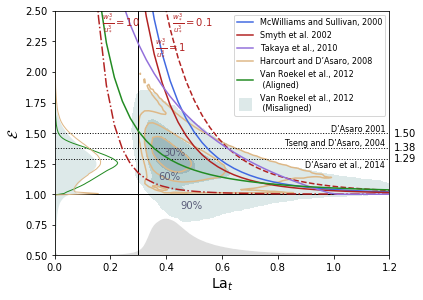

In [9]:
# plot figure
f = plt.figure()
f.set_size_inches(6, 4.5)
plt.axhline(y=1, linewidth=1, color='black')
plt.axvline(x=0.3, linewidth=1, color='black')

# range of axes
xlims = [0, 1.2]
ylims = [0.5, 2.5]

# D01
plt.axhline(y=ef_da01, linestyle=':', linewidth=1, color='black')
plt.text(xlims[1]-0.015, ef_da01, 'D’Asaro 2001',
         va='bottom', ha='right', fontsize=8)
plt.text(xlims[1]+0.015, ef_da01, '1.50', va='center', ha='left', fontsize=10)
# TD04
plt.axhline(y=ef_td04, linestyle=':', linewidth=1, color='black')
plt.text(xlims[1]-0.015, ef_td04, 'Tseng and D’Asaro, 2004',
         va='bottom', ha='right', fontsize=8)
plt.text(xlims[1]+0.015, ef_td04, '1.38', va='center', ha='left', fontsize=10)
# DT14
plt.axhline(y=ef_dt14, linestyle=':', linewidth=1, color='black')
plt.text(xlims[1]-0.015, ef_dt14-0.015, 'D’Asaro et al., 2014',
         va='top', ha='right', fontsize=8)
plt.text(xlims[1]+0.015, ef_dt14, '1.29', va='center', ha='left', fontsize=10)
# MS00
plt.plot(ls_laturb, ls_ef_ms2k, color='royalblue', label='McWilliams and Sullivan, 2000')
# SS02
plt.plot(ls_laturb, ls_ef_ss02a, linestyle='--', color='firebrick')
plt.text(0.42, 2.4, r'$\frac{w_*^3}{u_*^3}=0.1$', color='firebrick',
         va='center', ha='left', fontsize=10)
plt.plot(ls_laturb, ls_ef_ss02b, color='firebrick', label='Smyth et al. 2002')
plt.text(0.36, 2.2, r'$\frac{w_*^3}{u_*^3}=1$', color='firebrick',
         va='center', ha='left', fontsize=10)
plt.plot(ls_laturb, ls_ef_ss02c, linestyle='-.', color='firebrick')
plt.text(0.17, 2.4, r'$\frac{w_*^3}{u_*^3}=10$', color='firebrick',
         va='center', ha='left', fontsize=10)
# TB10
plt.plot(ls_laturb, ls_ef_tb10, color='mediumpurple', label='Takaya et al., 2010')
# ghost plot for HD08
plt.plot(np.nan, np.nan, color='burlywood', linestyle='-', linewidth=1.5,
         label='Harcourt and D’Asaro, 2008')
# VR12 AL
plt.plot(ls_laturb, ls_ef_vr12_al, color='forestgreen',
         label='Van Roekel et al., 2012 \n (Aligned)')
# VR12 MA
hist, xi, yi = get_hist2d(fl_laturb, fl_ef_vr12_ma, [0, 1.5], [0, 2.5])
plot_dist_3p(hist, xi, yi, filled=True)
# HD08
hist, xi, yi = get_hist2d(fl_laturb, fl_ef_hd08, [0, 1.5], [0, 2.5])
plot_dist_3p(hist, xi, yi, colors='burlywood', linestyles='-')

# Langmuir number
hist, xi = get_hist(fl_laturb, [0, 1.5])
xx = xi
yy = hist/hist.max()*0.3+ylims[0]
ax = plt.gca()
ax.fill_between(xx, yy, 0, facecolor='lightgray', alpha=0.75)

# Enhancement factor
# - VR12 MA
hist, xi = get_hist(fl_ef_vr12_ma, [0, 2.5])
yy = xi
ef_hist_max = hist.max()
xx = hist/ef_hist_max*0.15
ax = plt.gca()
fcolor = cm.get_cmap('bone')(0.9)
fcolor2 = cm.get_cmap('bone')(0.4)
ax.fill_betweenx(yy, xx, 0, facecolor=fcolor)
ax.text(0.39, 1.32, '30%', color=fcolor2);
ax.text(0.37, 1.12, '60%', color=fcolor2);
ax.text(0.45, 0.88, '90%', color=fcolor2);
# - VR12 AL
hist, xi = get_hist(fl_ef_vr12_al, [0, 2.5])
yy = xi
xx = hist/ef_hist_max*0.15
plt.plot(xx, yy, color='forestgreen', linestyle='-', linewidth=1)
# - HD08
hist, xi = get_hist(fl_ef_hd08, [0, 2.5])
yy = xi
xx = hist/ef_hist_max*0.15
plt.plot(xx, yy, color='burlywood', linestyle='-', linewidth=1)
# ghost plot
plt.scatter(10, 10, s=150,  marker='s', color=fcolor,
            label='Van Roekel et al., 2012 \n (Misaligned)')

# legend
plt.legend(loc='upper right', fontsize=8)

# set axis
plt.xlim(xlims)
plt.ylim(ylims)
plt.xlabel('La$_t$', fontsize=14)
plt.ylabel(r'$\mathcal{E}$', fontsize=14)

# reduce margin
# plt.tight_layout()

# save figure
figname = fig_root+'/fig_efactor.png'
plt.savefig(figname, dpi = 300)